In [1]:
setwd('~/lecture/riii/')

### windows open utf8 file encoding problem
- http://rwepa.blogspot.com/2017/09/ansifileencoding.html

In [ ]:
read_csv('./data/ptt_sample.csv',header=T,fileEncoding="UTF-8-BOM")

In [3]:
load('./Statistics/appledaily.RData')

In [4]:
ls()

[1] "appledaily"

In [5]:
str(appledaily)

'data.frame':	1500 obs. of  5 variables:
 $ content : chr  "\n                                        (更新:新增影片)想要透過刮刮樂彩券一夕致富，但他卻用錯方法！台中市一名"| __truncated__ "\n                                        澳洲一名就讀雪梨大學的華裔博士生，日前公開一段燒毀中國護照的影片，還"| __truncated__ "\n                                        【行銷專題企劃】房價高高在上，沒錢買房沒關係，但你認為自己是聰明的租"| __truncated__ "\n                                        本內容由中央廣播電臺提供        美國國防部長卡特(Ash Carter)今天(15日"| __truncated__ ...
 $ title   : chr  "【更新】搶2.2萬彩券刮中1.4萬　沒發財還得入獄" "拿到澳洲護照後　他放火燒中國護照" "【特企】房市大追擊- 租屋這些事情要小心" "【央廣RTI】美菲軍演  美防長南海登艦" ...
 $ dt      : chr  "2016年04月15日14:32" "2016年04月15日14:32" "2016年04月15日14:31" "2016年04月15日14:30" ...
 $ category: chr  "社會" "國際" "地產" "國際" ...
 $ clicked : chr  "人氣(1754)" "人氣(0)" "人氣(0)" "人氣(0)" ...


In [8]:
dt = as.POSIXct(appledaily$dt,format='%Y年%m月%d日%H:%M')

### Date 和 POSIX 差別
- Date類別表示 "日期",  表示距離1970/1/1多少天, 單位為天
- POSIX類別表示 "時間", 表示距離1970/1/1多少秒, 單位為秒

In [11]:
unclass( as.Date(Sys.time()) )

[1] 17760

In [14]:
unclass( as.POSIXct(Sys.time()) )

[1] 1534475394

# POSIXct vs POSIXlt

In [16]:
as.POSIXct(Sys.time())

[1] "2018-08-17 11:11:26 CST"

In [18]:
unclass(as.POSIXct(Sys.time()))

[1] 1534475511

In [17]:
as.POSIXlt(Sys.time())

[1] "2018-08-17 11:11:32 CST"

In [21]:
unclass(as.POSIXlt(Sys.time()))$year + 1900

[1] 2018

In [22]:
unclass(as.POSIXlt(Sys.time()))$mon + 1

[1] 8

In [23]:
unclass(as.POSIXlt(Sys.time()))$mday

[1] 17

In [24]:
appledaily$dt = dt

### convert timestamp to datetime

In [62]:
tm = as.integer(unclass(as.POSIXct(Sys.time())))
tm

[1] 1534477328

In [66]:
as.POSIXct(tm,origin='1970-01-01',tz = 'Japan')

[1] "2018-08-17 12:42:08 JST"

In [67]:
as.POSIXct(tm,origin='1970-01-01',tz = 'Asia/Taipei')

[1] "2018-08-17 11:42:08 CST"

In [69]:
?as.POSIXct

In [25]:
str(appledaily)

'data.frame':	1500 obs. of  5 variables:
 $ content : chr  "\n                                        (更新:新增影片)想要透過刮刮樂彩券一夕致富，但他卻用錯方法！台中市一名"| __truncated__ "\n                                        澳洲一名就讀雪梨大學的華裔博士生，日前公開一段燒毀中國護照的影片，還"| __truncated__ "\n                                        【行銷專題企劃】房價高高在上，沒錢買房沒關係，但你認為自己是聰明的租"| __truncated__ "\n                                        本內容由中央廣播電臺提供        美國國防部長卡特(Ash Carter)今天(15日"| __truncated__ ...
 $ title   : chr  "【更新】搶2.2萬彩券刮中1.4萬　沒發財還得入獄" "拿到澳洲護照後　他放火燒中國護照" "【特企】房市大追擊- 租屋這些事情要小心" "【央廣RTI】美菲軍演  美防長南海登艦" ...
 $ dt      : POSIXct, format: "2016-04-15 14:32:00" "2016-04-15 14:32:00" ...
 $ category: chr  "社會" "國際" "地產" "國際" ...
 $ clicked : chr  "人氣(1754)" "人氣(0)" "人氣(0)" "人氣(0)" ...


### sub => python replace 

In [35]:
tmp = sub('人氣\\(','',appledaily$clicked)

In [36]:
tmp = sub('\\)','',tmp)

In [38]:
clicked = as.integer(tmp)

In [40]:
library(stringr)

### str_match => python re.match

In [41]:
?str_match

In [50]:
clicked = as.integer( str_match(appledaily$clicked,'人氣\\((\\d+)\\)')[,2] )

In [51]:
appledaily$clicked = clicked

In [52]:
str(appledaily)

'data.frame':	1500 obs. of  5 variables:
 $ content : chr  "\n                                        (更新:新增影片)想要透過刮刮樂彩券一夕致富，但他卻用錯方法！台中市一名"| __truncated__ "\n                                        澳洲一名就讀雪梨大學的華裔博士生，日前公開一段燒毀中國護照的影片，還"| __truncated__ "\n                                        【行銷專題企劃】房價高高在上，沒錢買房沒關係，但你認為自己是聰明的租"| __truncated__ "\n                                        本內容由中央廣播電臺提供        美國國防部長卡特(Ash Carter)今天(15日"| __truncated__ ...
 $ title   : chr  "【更新】搶2.2萬彩券刮中1.4萬　沒發財還得入獄" "拿到澳洲護照後　他放火燒中國護照" "【特企】房市大追擊- 租屋這些事情要小心" "【央廣RTI】美菲軍演  美防長南海登艦" ...
 $ dt      : POSIXct, format: "2016-04-15 14:32:00" "2016-04-15 14:32:00" ...
 $ category: chr  "社會" "國際" "地產" "國際" ...
 $ clicked : int  1754 0 0 0 311 24 20 314 27 308 ...


### 其他常見字串處理函式

In [ ]:
#grep, grepl

In [70]:
test_str = c('abcd','bcd','cde')

In [71]:
grep('bc',test_str)

[1] 1 2

In [76]:
appledaily[grep('中國',appledaily$title[1:5]),]

,content,title,dt,category,clicked
2,澳洲一名就讀雪梨大學的華裔博士生，日前公開一段燒毀中國護照的影片，還大肆批評留澳學生是一群「留學豬」。消息傳出後，這名博士生立刻被大陸網友起底。 據悉，該博士生姓名為吳維，正在雪梨大學攻讀金融學博士，同時在該校任教，並於去年加入澳洲籍。該博士生的微博名為「Pekojima」，該賬號從2012年開始一直處於活躍狀態。他稱自己為「澳洲公民」、「雪梨大學商學院全獎」、「金融系 Ph.D.」、「本系必修課head tutor」。但此微博現已被刪除。他也曾在微博上諷刺中國留學生的智商，稱他們「要花錢找論文代寫」，並侮辱留學生為「留學豬」。 英國《每日郵報》報導稱，雪梨大學已開始調查他焚燒中國護照一事。（大陸中心／綜合報導） 更多國際新聞請進蘋果繞著地球爆 翻攝網路翻攝網路 googletag.cmd.push(function() {googletag.display('teadstv');}) googletag.cmd.push(function() {googletag.display('goldenhorse');}) googletag.cmd.push(function() {googletag.display('textlink');}) 有話要說 投稿「即時論壇」,拿到澳洲護照後 他放火燒中國護照,2016-04-15 14:32:00,國際,0


In [82]:
grepl('中國',appledaily$title[1:5])

[1] FALSE  TRUE FALSE FALSE FALSE

In [83]:
appledaily[1:5,][grepl('中國',appledaily$title[1:5]),]

,content,title,dt,category,clicked
2,澳洲一名就讀雪梨大學的華裔博士生，日前公開一段燒毀中國護照的影片，還大肆批評留澳學生是一群「留學豬」。消息傳出後，這名博士生立刻被大陸網友起底。 據悉，該博士生姓名為吳維，正在雪梨大學攻讀金融學博士，同時在該校任教，並於去年加入澳洲籍。該博士生的微博名為「Pekojima」，該賬號從2012年開始一直處於活躍狀態。他稱自己為「澳洲公民」、「雪梨大學商學院全獎」、「金融系 Ph.D.」、「本系必修課head tutor」。但此微博現已被刪除。他也曾在微博上諷刺中國留學生的智商，稱他們「要花錢找論文代寫」，並侮辱留學生為「留學豬」。 英國《每日郵報》報導稱，雪梨大學已開始調查他焚燒中國護照一事。（大陸中心／綜合報導） 更多國際新聞請進蘋果繞著地球爆 翻攝網路翻攝網路 googletag.cmd.push(function() {googletag.display('teadstv');}) googletag.cmd.push(function() {googletag.display('goldenhorse');}) googletag.cmd.push(function() {googletag.display('textlink');}) 有話要說 投稿「即時論壇」,拿到澳洲護照後 他放火燒中國護照,2016-04-15 14:32:00,國際,0


In [78]:
sum(grepl('bc',test_str))

[1] 2

In [79]:
length(grep('bc',test_str))

[1] 2

In [91]:
#strsplit
test_str = c('abc-def','fff-ggg')

In [92]:
print( strsplit(test_str,'-') )

[[1]]
[1] "abc" "def"

[[2]]
[1] "fff" "ggg"



In [93]:
class( strsplit(test_str,'-') )

[1] "list"

In [94]:
strsplit(test_str,'-')[[1]][1]

[1] "abc"

In [98]:
tmp = unlist( strsplit(test_str,'-') )

In [99]:
tmp[seq(1,length(tmp),by=2)]

[1] "abc" "fff"

In [100]:
tmp[seq(2,length(tmp),by=2)]

[1] "def" "ggg"

In [96]:
seq(1,3,by=2)

[1] 1 3

In [ ]:
#substring

In [101]:
test_s = 'abcdef'

In [105]:
substr(test_s,start=2,stop=5)

[1] "bcde"

In [107]:
substring(test_s,first=2,last=nchar(test_s)-1)

[1] "bcde"

In [108]:
str(appledaily)

'data.frame':	1500 obs. of  5 variables:
 $ content : chr  "\n                                        (更新:新增影片)想要透過刮刮樂彩券一夕致富，但他卻用錯方法！台中市一名"| __truncated__ "\n                                        澳洲一名就讀雪梨大學的華裔博士生，日前公開一段燒毀中國護照的影片，還"| __truncated__ "\n                                        【行銷專題企劃】房價高高在上，沒錢買房沒關係，但你認為自己是聰明的租"| __truncated__ "\n                                        本內容由中央廣播電臺提供        美國國防部長卡特(Ash Carter)今天(15日"| __truncated__ ...
 $ title   : chr  "【更新】搶2.2萬彩券刮中1.4萬　沒發財還得入獄" "拿到澳洲護照後　他放火燒中國護照" "【特企】房市大追擊- 租屋這些事情要小心" "【央廣RTI】美菲軍演  美防長南海登艦" ...
 $ dt      : POSIXct, format: "2016-04-15 14:32:00" "2016-04-15 14:32:00" ...
 $ category: chr  "社會" "國際" "地產" "國際" ...
 $ clicked : int  1754 0 0 0 311 24 20 314 27 308 ...


In [110]:
table(appledaily$category)


                      3C                     財經                     地產 
                      37                      121                       32 
                    動物                     國際 國際","LA","SF","NY","US 
                      26                      273                        9 
          國際","SF","US                     論壇                     社會 
                       3                       55                      194 
                    生活                     時尚                     搜奇 
                     298                       38                       55 
                    體育                     娛樂                     正妹 
                      95                      113                        8 
                    政治 
                     143 

In [113]:
appledaily$category[appledaily$category == '國際","LA","SF","NY","US'] = '國際'

In [116]:
appledaily$category[appledaily$category == '國際","SF","US'] = '國際'

In [123]:
table(appledaily$category)


  3C 財經 地產 動物 國際 論壇 社會 生活 時尚 搜奇 體育 娛樂 正妹 政治 
  37  121   32   26  285   55  194  298   38   55   95  113    8  143 

In [119]:
applenews = appledaily

In [121]:
save(applenews,file='./Statistics/applenews.RData')

In [132]:
set.seed(2)
sample(1:nrow(applenews),30)

[1]  278 1053  859  252 1412 1411  193 1245  699  821  824  356 1132  269  603
[16] 1268 1449  335  660  112  980  574 1237  223  513  721  220  526 1418  195

In [133]:
set.seed(2)
sample(1:nrow(applenews),30)

[1]  278 1053  859  252 1412 1411  193 1245  699  821  824  356 1132  269  603
[16] 1268 1449  335  660  112  980  574 1237  223  513  721  220  526 1418  195

In [137]:
na_list = sample(1:nrow(applenews),30)

In [140]:
applenews[na_list,'clicked'] = NA

In [144]:
sum(is.na(applenews$clicked))

[1] 30

In [143]:
is.numeric(applenews$clicked)

[1] TRUE

In [ ]:
### complete.cases

In [148]:
nrow(applenews[complete.cases(applenews),])

[1] 1470

In [149]:
completed_data = applenews[complete.cases(applenews),]

In [150]:
str(completed_data)

'data.frame':	1470 obs. of  5 variables:
 $ content : chr  "\n                                        (更新:新增影片)想要透過刮刮樂彩券一夕致富，但他卻用錯方法！台中市一名"| __truncated__ "\n                                        澳洲一名就讀雪梨大學的華裔博士生，日前公開一段燒毀中國護照的影片，還"| __truncated__ "\n                                        【行銷專題企劃】房價高高在上，沒錢買房沒關係，但你認為自己是聰明的租"| __truncated__ "\n                                        本內容由中央廣播電臺提供        美國國防部長卡特(Ash Carter)今天(15日"| __truncated__ ...
 $ title   : chr  "【更新】搶2.2萬彩券刮中1.4萬　沒發財還得入獄" "拿到澳洲護照後　他放火燒中國護照" "【特企】房市大追擊- 租屋這些事情要小心" "【央廣RTI】美菲軍演  美防長南海登艦" ...
 $ dt      : POSIXct, format: "2016-04-15 14:32:00" "2016-04-15 14:32:00" ...
 $ category: chr  "社會" "國際" "地產" "國際" ...
 $ clicked : int  1754 0 0 0 311 24 20 314 27 308 ...


In [158]:
### mean
mean_clicked = as.integer(mean(applenews$clicked,na.rm=T))
mean_clicked

[1] 14442

In [161]:
applenews$clicked[is.na(applenews$clicked)] = mean_clicked

In [162]:
sum(is.na(applenews$clicked))

[1] 0

In [164]:
load('./Statistics/applenews.RData')

In [165]:
applenews[na_list,'clicked'] = NA

In [166]:
sum(is.na(applenews$clicked))

[1] 30

In [167]:
head(applenews$clicked)

[1] 1754    0    0    0  311   24

In [168]:
head(applenews$category)

[1] "社會" "國際" "地產" "國際" "時尚" "財經"

In [174]:
#category means
cate_means = tapply(applenews$clicked,applenews$category,function(e){ as.integer(mean(e,na.rm=T))}) 

In [175]:
print(cate_means)

   3C  財經  地產  動物  國際  論壇  社會  生活  時尚  搜奇  體育  娛樂  正妹 
 3954  5024  6900  4741  8927  5764 29784 11370  7143 12315 16907 31930 84118 
 政治 
11718 


In [182]:
applenews[is.na(applenews$clicked) & applenews$category == '財經','clicked'] = cate_means['財經']

In [188]:
for(i in 1:length(cate_means)){
 applenews[is.na(applenews$clicked) & applenews$category == names(cate_means)[i],'clicked'] = cate_means[i]   
}

In [187]:
print( names(cate_means)[2] )

[1] "財經"


In [184]:
length(cate_means)

[1] 14

In [190]:
sum(is.na(applenews$clicked))

[1] 0

In [192]:
#mice
install.packages('mice')

also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lme4’, ‘forcats’, ‘hms’, ‘readr’, ‘pan’, ‘jomo’, ‘haven’, ‘mitml’




The downloaded binary packages are in
	/var/folders/l7/cnn4lm695h35bfc25v36gxqm0000gn/T//Rtmp96Gmb2/downloaded_packages


In [193]:
library(mice)

Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind



In [194]:
data(iris)

In [196]:
na_list = sample(1:nrow(iris),15)

In [198]:
iris[na_list,'Sepal.Length'] = NA

In [202]:
mice_data = mice(data=iris,m=3,method='cart')


 iter imp variable
  1   1  Sepal.Length
  1   2  Sepal.Length
  1   3  Sepal.Length
  2   1  Sepal.Length
  2   2  Sepal.Length
  2   3  Sepal.Length
  3   1  Sepal.Length
  3   2  Sepal.Length
  3   3  Sepal.Length
  4   1  Sepal.Length
  4   2  Sepal.Length
  4   3  Sepal.Length
  5   1  Sepal.Length
  5   2  Sepal.Length
  5   3  Sepal.Length


In [211]:
complete(mice_data,1)[na_list,'Sepal.Length']

[1] 5.1 5.6 5.6 5.0 5.8 5.7 7.2 5.1 5.0 6.9 7.4 7.6 5.0 6.4 5.5

In [212]:
complete(mice_data,2)[na_list,'Sepal.Length']

[1] 5.0 5.5 6.0 4.8 6.3 5.7 7.6 5.4 5.1 6.8 7.6 7.6 5.1 6.4 4.9

In [213]:
complete(mice_data,3)[na_list,'Sepal.Length']

[1] 5.1 6.0 5.6 5.0 6.1 5.1 7.6 5.1 5.1 6.9 7.4 7.7 5.2 6.7 5.0

In [215]:
diff = complete(mice_data,1)[na_list,'Sepal.Length'] - complete(mice_data,2)[na_list,'Sepal.Length']

In [216]:
mean(diff)

[1] -0.06

In [217]:
sd(diff)

[1] 0.2797958

### [ dplyr ]
cheat sheet
- https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf

- 類SQL語法,select,filter,arrange,mutate...
- Chaining %>%, debug方便


In [219]:
load('./Statistics/applenews.RData')

In [222]:
applenews = applenews[-1]

In [223]:
filter(applenews,category == '娛樂')

title,dt,category,clicked
澎恰恰收女弟子 拱當台灣第一名伶,2016-04-15 14:17:00,娛樂,1749
【唱新聞】詐騙嗎？R.O.C.有CHINA但不是CHINA,2016-04-15 14:00:00,娛樂,11696
白曉燕命案19年了 白冰冰「不能忘」,2016-04-15 13:49:00,娛樂,3329
好萊塢男神好威 女友再當高齡產婦,2016-04-15 13:40:00,娛樂,4307
隋棠帶兒遠征南台灣 吃成膨皮母子檔,2016-04-15 13:30:00,娛樂,4651
伊勢谷友介掰了長澤雅美 半同居小16歲辣模,2016-04-15 13:23:00,娛樂,5141
徐佳瑩開唱前驚傳失聲 急診照曝光,2016-04-15 13:08:00,娛樂,11588
死侍續攤雙喜 花邊教主又有了！,2016-04-15 13:00:00,娛樂,5209
【更新】《太陽》完美結局 沉船灣之吻收視最熱,2016-04-15 12:29:00,娛樂,27010
宋慧喬愛國拒代言 台大教授批韓軍「應被唾棄」,2016-04-15 11:52:00,娛樂,10455


In [225]:
filter(applenews,category == '娛樂' & clicked > 10000)

title,dt,category,clicked
【唱新聞】詐騙嗎？R.O.C.有CHINA但不是CHINA,2016-04-15 14:00:00,娛樂,11696
徐佳瑩開唱前驚傳失聲 急診照曝光,2016-04-15 13:08:00,娛樂,11588
【更新】《太陽》完美結局 沉船灣之吻收視最熱,2016-04-15 12:29:00,娛樂,27010
宋慧喬愛國拒代言 台大教授批韓軍「應被唾棄」,2016-04-15 11:52:00,娛樂,10455
【請回答】六月李易對質實況 出軌X次說清楚！,2016-04-15 11:40:00,娛樂,88386
劉愷威被問楊冪超囧 擠不出上次何時見,2016-04-15 10:30:00,娛樂,10478
1小時燒5萬！宋仲基白斬雞變筋肉男,2016-04-15 10:04:00,娛樂,13351
超級Kobe粉是她！ 女神奔球場又哭又尖叫,2016-04-15 07:08:00,娛樂,12420
炫咘咘藏梧桐妹 賈靜雯自曝「不愛」原因,2016-04-15 06:56:00,娛樂,80200
連勝文被瞎報特權搭機喊告 三立：已更新,2016-04-15 01:10:00,娛樂,19030


In [227]:
filter(applenews,category == '娛樂' | category == '社會')

title,dt,category,clicked
【更新】搶2.2萬彩券刮中1.4萬 沒發財還得入獄,2016-04-15 14:32:00,社會,1754
同居人女兒熟睡 淫男伸狼爪,2016-04-15 14:22:00,社會,1076
澎恰恰收女弟子 拱當台灣第一名伶,2016-04-15 14:17:00,娛樂,1749
【驚險有片】BMW撞翻撞公車 後方機車神穿越,2016-04-15 14:12:00,社會,11886
【唱新聞】詐騙嗎？R.O.C.有CHINA但不是CHINA,2016-04-15 14:00:00,娛樂,11696
九巡翁霸坐展售車？ 原因好心酸,2016-04-15 13:52:00,社會,4582
白曉燕命案19年了 白冰冰「不能忘」,2016-04-15 13:49:00,娛樂,3329
催討債務釀衝突 要小弟持槍討債先被抓,2016-04-15 13:47:00,社會,1154
男翻拍女友手機對話 PO爆料公社控劈腿,2016-04-15 13:45:00,社會,4322
好萊塢男神好威 女友再當高齡產婦,2016-04-15 13:40:00,娛樂,4307


In [229]:
applenews[applenews$category %in% c("娛樂","社會"),]

,title,dt,category,clicked
1,【更新】搶2.2萬彩券刮中1.4萬 沒發財還得入獄,2016-04-15 14:32:00,社會,1754
11,同居人女兒熟睡 淫男伸狼爪,2016-04-15 14:22:00,社會,1076
16,澎恰恰收女弟子 拱當台灣第一名伶,2016-04-15 14:17:00,娛樂,1749
19,【驚險有片】BMW撞翻撞公車 後方機車神穿越,2016-04-15 14:12:00,社會,11886
21,【唱新聞】詐騙嗎？R.O.C.有CHINA但不是CHINA,2016-04-15 14:00:00,娛樂,11696
26,九巡翁霸坐展售車？ 原因好心酸,2016-04-15 13:52:00,社會,4582
32,白曉燕命案19年了 白冰冰「不能忘」,2016-04-15 13:49:00,娛樂,3329
34,催討債務釀衝突 要小弟持槍討債先被抓,2016-04-15 13:47:00,社會,1154
35,男翻拍女友手機對話 PO爆料公社控劈腿,2016-04-15 13:45:00,社會,4322
40,好萊塢男神好威 女友再當高齡產婦,2016-04-15 13:40:00,娛樂,4307


In [230]:
filter(applenews,category %in% c("娛樂","社會"))

title,dt,category,clicked
【更新】搶2.2萬彩券刮中1.4萬 沒發財還得入獄,2016-04-15 14:32:00,社會,1754
同居人女兒熟睡 淫男伸狼爪,2016-04-15 14:22:00,社會,1076
澎恰恰收女弟子 拱當台灣第一名伶,2016-04-15 14:17:00,娛樂,1749
【驚險有片】BMW撞翻撞公車 後方機車神穿越,2016-04-15 14:12:00,社會,11886
【唱新聞】詐騙嗎？R.O.C.有CHINA但不是CHINA,2016-04-15 14:00:00,娛樂,11696
九巡翁霸坐展售車？ 原因好心酸,2016-04-15 13:52:00,社會,4582
白曉燕命案19年了 白冰冰「不能忘」,2016-04-15 13:49:00,娛樂,3329
催討債務釀衝突 要小弟持槍討債先被抓,2016-04-15 13:47:00,社會,1154
男翻拍女友手機對話 PO爆料公社控劈腿,2016-04-15 13:45:00,社會,4322
好萊塢男神好威 女友再當高齡產婦,2016-04-15 13:40:00,娛樂,4307


In [231]:
select(applenews,dt,clicked,category)

dt,clicked,category
2016-04-15 14:32:00,1754,社會
2016-04-15 14:32:00,0,國際
2016-04-15 14:31:00,0,地產
2016-04-15 14:30:00,0,國際
2016-04-15 14:28:00,311,時尚
2016-04-15 14:28:00,24,財經
2016-04-15 14:25:00,20,生活
2016-04-15 14:24:00,314,生活
2016-04-15 14:24:00,27,生活
2016-04-15 14:23:00,308,生活


In [233]:
select(applenews,dt:clicked)

dt,category,clicked
2016-04-15 14:32:00,社會,1754
2016-04-15 14:32:00,國際,0
2016-04-15 14:31:00,地產,0
2016-04-15 14:30:00,國際,0
2016-04-15 14:28:00,時尚,311
2016-04-15 14:28:00,財經,24
2016-04-15 14:25:00,生活,20
2016-04-15 14:24:00,生活,314
2016-04-15 14:24:00,生活,27
2016-04-15 14:23:00,生活,308


In [239]:
select(applenews,contains('cate'))

category
社會
國際
地產
國際
時尚
財經
生活
生活
生活
生活


In [241]:
select(iris,starts_with('Sepal'))

Sepal.Length,Sepal.Width
5.1,3.5
4.9,3.0
4.7,3.2
4.6,3.1
5.0,3.6
5.4,3.9
NA,3.4
5.0,3.4
4.4,2.9
4.9,3.1


In [242]:
select(iris,ends_with('Length'))

Sepal.Length,Petal.Length
5.1,1.4
4.9,1.4
4.7,1.3
4.6,1.5
5.0,1.4
5.4,1.7
NA,1.4
5.0,1.5
4.4,1.4
4.9,1.5


In [244]:
filter(applenews,category %in% c("娛樂","社會")) %>% select(dt:clicked)

dt,category,clicked
2016-04-15 14:32:00,社會,1754
2016-04-15 14:22:00,社會,1076
2016-04-15 14:17:00,娛樂,1749
2016-04-15 14:12:00,社會,11886
2016-04-15 14:00:00,娛樂,11696
2016-04-15 13:52:00,社會,4582
2016-04-15 13:49:00,娛樂,3329
2016-04-15 13:47:00,社會,1154
2016-04-15 13:45:00,社會,4322
2016-04-15 13:40:00,娛樂,4307


In [247]:
head( select( filter(applenews,category %in% c("娛樂","社會")), dt:clicked ) )

dt,category,clicked
2016-04-15 14:32:00,社會,1754
2016-04-15 14:22:00,社會,1076
2016-04-15 14:17:00,娛樂,1749
2016-04-15 14:12:00,社會,11886
2016-04-15 14:00:00,娛樂,11696
2016-04-15 13:52:00,社會,4582


In [253]:
applenews %>%
filter(category %in% c("娛樂","社會")) %>%
select(dt:clicked) %>%
arrange(desc(clicked)) %>%
head(20)

dt,category,clicked
2016-04-13 17:08:00,娛樂,299235
2016-04-14 00:05:00,娛樂,265355
2016-04-14 19:15:00,社會,241842
2016-04-14 08:23:00,娛樂,239697
2016-04-14 09:32:00,社會,228203
2016-04-13 20:08:00,社會,217096
2016-04-13 19:03:00,社會,214796
2016-04-15 09:42:00,社會,172024
2016-04-14 06:30:00,社會,171408
2016-04-14 20:45:00,社會,150666


In [257]:
freq_sum = applenews %>% select(clicked) %>% sum()

In [263]:
applenews = applenews %>% mutate(portion = clicked / freq_sum )

In [260]:
applenews %>% group_by(category) %>% summarise(cate_means= mean(clicked))

category,cate_means
3C,3954.270
財經,5109.446
地產,6900.375
動物,4741.808
國際,8913.723
論壇,5683.491
社會,29493.557
生活,11469.141
時尚,6855.237
搜奇,12151.036


In [261]:
?summarize_at

In [262]:
applenews

title,dt,category,clicked
【更新】搶2.2萬彩券刮中1.4萬 沒發財還得入獄,2016-04-15 14:32:00,社會,1754
拿到澳洲護照後 他放火燒中國護照,2016-04-15 14:32:00,國際,0
【特企】房市大追擊- 租屋這些事情要小心,2016-04-15 14:31:00,地產,0
【央廣RTI】美菲軍演 美防長南海登艦,2016-04-15 14:30:00,國際,0
全球最閃牽手夫妻 絕美禮服出自台灣…,2016-04-15 14:28:00,時尚,311
公司遭搜索 浩鼎籲檢調勿公開商業機密,2016-04-15 14:28:00,財經,24
【央廣RTI】每318秒就有1人罹癌 大腸癌名列第一,2016-04-15 14:25:00,生活,20
垃圾掉滿地 村民請神明幫忙,2016-04-15 14:24:00,生活,314
【熊本強震】取消去九州 華航5月8日前退改票免手續費,2016-04-15 14:24:00,生活,27
麵龜摻非工業色素 千顆不良品早下肚,2016-04-15 14:23:00,生活,308


In [265]:
applenews %>% group_by(category) %>% summarise_at(.vars=vars(clicked,portion),.funs=funs(mean,sum,min,max))

category,clicked_mean,portion_mean,clicked_sum,portion_sum,clicked_min,portion_min,clicked_max,portion_max
3C,3954.270,0.0001832886,146308,0.006781677,267,1.237600e-05,20509,0.0009506344
財經,5109.446,0.0002368334,618243,0.028656837,24,1.112449e-06,54886,0.0025440792
地產,6900.375,0.0003198466,220812,0.010235091,0,0.000000e+00,80691,0.0037401941
動物,4741.808,0.0002197926,123287,0.005714606,1211,5.613235e-05,11753,0.0005447758
國際,8913.723,0.0004131694,2540411,0.117753284,0,0.000000e+00,150825,0.0069910495
論壇,5683.491,0.0002634415,312592,0.014489283,275,1.274682e-05,68208,0.0031615813
社會,29493.557,0.0013670871,5721750,0.265214902,918,4.255119e-05,241842,0.0112098750
生活,11469.141,0.0005316183,3417804,0.158422257,20,9.270412e-07,132880,0.0061592618
時尚,6855.237,0.0003177544,260499,0.012074665,311,1.441549e-05,67086,0.0031095743
搜奇,12151.036,0.0005632256,668307,0.030977406,199,9.224060e-06,83036,0.0038488897


In [277]:
cat_stats = applenews %>% group_by(category) %>% summarise(clicked_mean = mean(clicked)) %>% arrange(desc(clicked_mean))
cat_stats

category,clicked_mean
正妹,84118.625
娛樂,31601.814
社會,29493.557
體育,16821.758
搜奇,12151.036
政治,11901.958
生活,11469.141
國際,8913.723
地產,6900.375
時尚,6855.237


In [278]:
cat_stats$category

[1] "正妹" "娛樂" "社會" "體育" "搜奇" "政治" "生活" "國際" "地產" "時尚"
[11] "論壇" "財經" "動物" "3C"

In [282]:
library(ggplot2)
g=ggplot(cat_stats,aes(x=category,y=clicked_mean)) + geom_bar(stat='identity')+ theme(text=element_text(family="Songti SC"))+scale_x_discrete(limits=cat_stats$category)


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript

“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label

“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label

“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label

“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label

“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Songti SC' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.

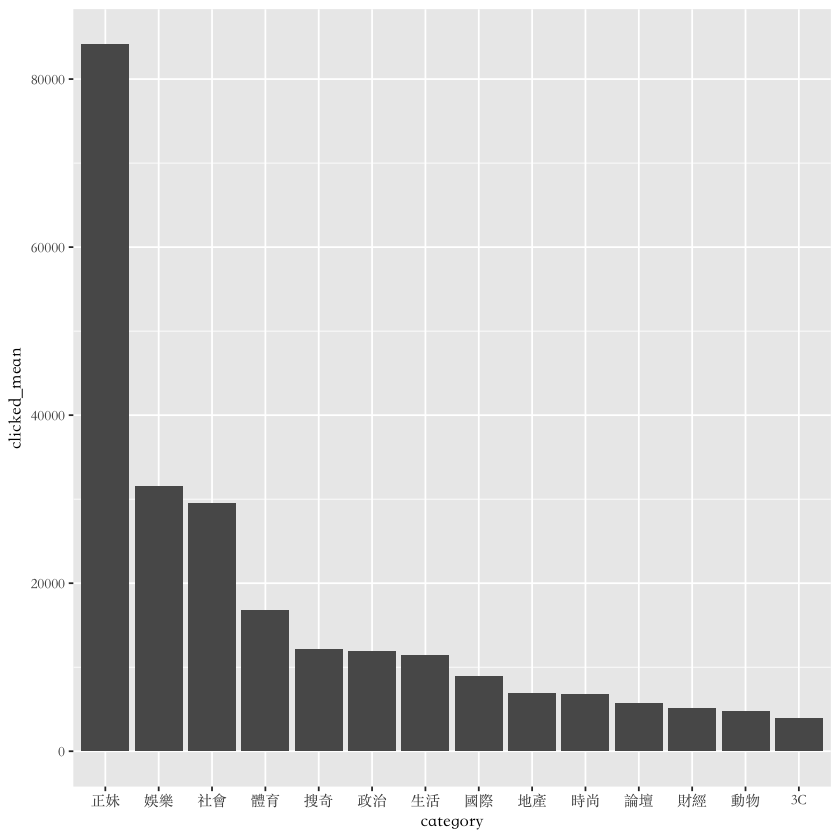

In [283]:
g

In [284]:
# install.packages('dbplyr')
# install.packages('RMySQL')
library('dbplyr')
library('RMySQL')

Loading required package: DBI

Attaching package: ‘RMySQL’

The following object is masked from ‘package:RSQLite’:

    isIdCurrent



In [285]:
?src_mysql

In [286]:
conn = src_mysql(dbname='test',host='127.0.0.1',port=3306,user='root',password='pythonetl')

In [288]:
src_tbls(conn)

[1] "iris" "pcc"  "user"

In [289]:
?copy_to

In [301]:
copy_to(conn,iris,overwrite=T,temporary = F)

In [291]:
?tbl

In [294]:
tbl(conn,'iris') %>% group_by(Species) %>% summarise( cat_means = mean(Sepal.Length)) %>% collect()

Warning message:
“Missing values are always removed in SQL.
Use `AVG(x, na.rm = TRUE)` to silence this warning”

Species,cat_means
setosa,5.031818
versicolor,5.966667
virginica,6.537209


In [295]:
help(package='DBI')

In [296]:
library('RMySQL')

In [297]:
conn2 = dbConnect(MySQL(),dbname='test',host='127.0.0.1',port=3306,user='root',password='pythonetl')

In [304]:
dbGetQuery(conn2,'select * from iris') %>% filter(Species == 'setosa')

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
NA,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [302]:
dbListTables(conn2)

[1] "iris" "pcc"  "user"